## K-Nearest Neighbors (KNN)

## 1. Introduction to K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple, non-parametric, and lazy learning algorithm used for both classification and regression tasks. It is lazy because it does not learn from the training set immediately instead it stores the dataset and at the time of classification it performs an action on the dataset.
It classifies a new data point based on the majority class among its 'K' nearest neighbors.


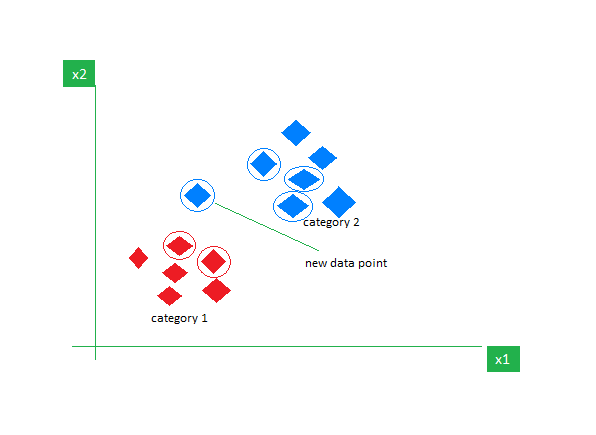

- The red diamonds represent Category 1 and the blue squares represent Category 2.
- The new data point checks its closest neighbours (circled points).
- Since the majority of its closest neighbours are blue squares (Category 2) KNN predicts the new data point belongs to Category 2.


Imagine you’re deciding which fruit it is based on its shape and size. You compare it to fruits you already know.

- If k = 3, the algorithm looks at the 3 closest fruits to the new one.
- If 2 of those 3 fruits are apples and 1 is a banana, the algorithm says the new fruit is an apple because most of its neighbours are apples.

## 2. How KNN Works
### Steps in KNN:
1. Choose the number of neighbors (K).
2. Compute the distance between the test sample and all training samples.
3. Select the K nearest neighbors based on the computed distances.
4. Assign the most common class among the neighbors (for classification) or take the average (for regression).


## Distance Metrics Used in KNN Algorithm


### Euclidean Distance (Default):
The Euclidean distance between two points x and y in an n-dimensional space is given by:

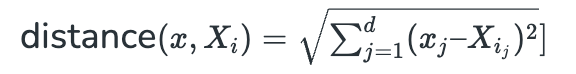



### Example Calculation of Euclidean Distance:
Consider two points in a 2D space:
- x = (1, 2)
- y = (4, 6)

Using the formula:

d(x, y) = sqrt((4 - 1)^2 + (6 - 2)^2)
         = sqrt(3^2 + 4^2)
         = sqrt(9 + 16)
         = sqrt(25)
         = 5

Thus, the Euclidean distance between x and y is 5.

### Manhattan Distance
### Minkowski Distance
### Hamming Distance


## 3. Implementation - Breast Cancer

In [38]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
breast_cancer_data = pd.read_csv('/Users/gaganpuri/Documents/Broadway/datasets/breast-cancer.csv') 
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
breast_cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

/var/folders/q1/1hc_zrdd33v7289_d_t0248w0000gn/T/ipykernel_46213/1255148844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=breast_cancer_data['diagnosis'], palette='coolwarm')


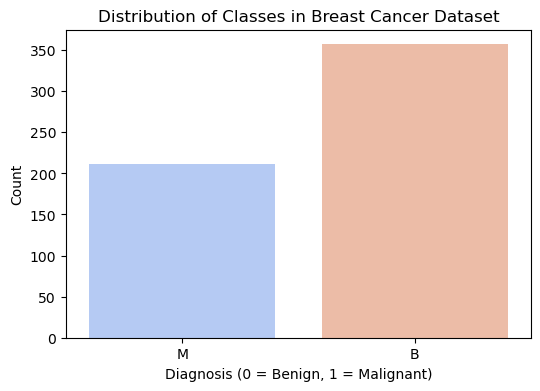

In [41]:
# Plot distribution of classes
plt.figure(figsize=(6, 4))
sns.countplot(x=breast_cancer_data['diagnosis'], palette='coolwarm')
plt.title('Distribution of Classes in Breast Cancer Dataset')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

In [42]:
breast_cancer_data.drop(columns=['id'], inplace=True)


In [43]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [44]:
# Encoding the target variable using LabelEncoder
label_encoder = LabelEncoder()
breast_cancer_data['diagnosis'] = label_encoder.fit_transform(breast_cancer_data['diagnosis'])

In [ ]:
# Splitting features and target
X_bc = breast_cancer_data.drop(columns=['diagnosis'])
y_bc = breast_cancer_data['diagnosis']

In [36]:
# Splitting into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Standardizing the data
scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)

# Training KNN model
knn_bc_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_bc_model.fit(X_train_bc, y_train_bc)

# Predictions
y_pred_bc = knn_bc_model.predict(X_test_bc)

# Evaluating the model
print("Breast Cancer Detection Accuracy:", accuracy_score(y_test_bc, y_pred_bc))
conf_mat = confusion_matrix(y_test_bc, y_pred_bc)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", classification_report(y_test_bc, y_pred_bc))

Breast Cancer Detection Accuracy: 0.9473684210526315
Confusion Matrix:
 [[68  3]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



<Axes: >

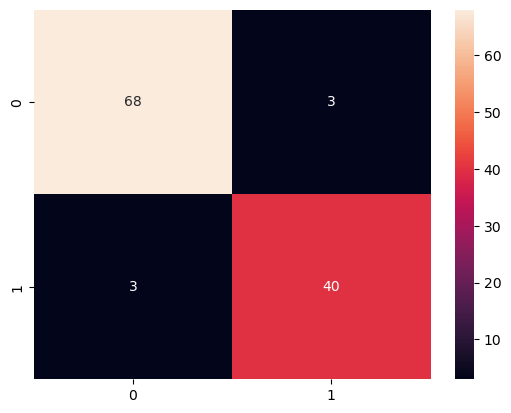

In [37]:
sns.heatmap(conf_mat, annot=True)

In [18]:
# Sample feature input for inference
sample_feature = np.array([X_test_bc[0]])

# Making a prediction
predicted_class = knn_bc_model.predict(sample_feature)
predicted_label = label_encoder.inverse_transform(predicted_class)
print("Predicted Diagnosis:", predicted_label[0])

Predicted Diagnosis: B


In [ ]:
# save the model in file for future use
# load the model and scaler in the streamlit app
# let user enter the features
# predict button --> predictions
